In [111]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [233]:
df = pd.read_csv('Dataset/SplineFitted/Cluster 3/friday.csv',index_col=0)
df

,a0,b0,c0,d0,a1,b1,c1,d1,a2,b2,...,d3,Average Daily Steps,No of active session,A_Mean,A_Median,A_Mode,No of sedentary session,S_Mean,S_Median,S_Mode
ID,,,,,,,,,,,,,,,,,,,,,
1471,2.000000,-38.037287,60.139263,-20.101977,4.000000,21.935310,-0.166667,-20.101977,5.666667,-38.703953,...,-19.604222,16620.000000,11,4727.348485,4529.333333,[997.83333333],6,2772.944444,7.083333,[2.]
1464,4.333333,-80.938188,125.323949,-41.719094,7.000000,44.552427,0.166667,-41.719094,10.000000,-80.271521,...,-249.662786,16051.666667,13,4392.153846,4547.666667,[550.66666667],6,2680.222222,11.000000,[4.33333333]
1465,2.833333,-71.305442,111.208163,-37.236054,5.500000,39.402721,-0.500000,-37.236054,7.166667,-73.305442,...,-219.151696,16131.000000,12,4040.347222,3984.333333,[502.83333333],6,2692.083333,8.000000,[2.83333333]
1466,2.166667,-81.149321,128.057314,-42.907994,6.166667,46.241327,-0.666667,-42.907994,8.833333,-83.815987,...,-298.751879,16231.000000,14,4468.166667,4415.750000,[538.33333333],6,2709.555556,10.333333,[2.16666667]
1467,2.666667,-69.427283,108.307592,-36.046975,5.500000,39.046975,0.166667,-36.046975,8.666667,-68.760617,...,-180.892524,17020.000000,15,4576.066667,4943.333333,[511.83333333],6,2840.750000,9.833333,[2.66666667]
1468,3.000000,-56.452988,89.262815,-29.809827,6.000000,32.643161,-0.166667,-29.809827,8.666667,-57.119655,...,-103.053387,17054.333333,14,4580.023810,4929.166667,[483.33333333],6,2846.944444,10.333333,[3.]
1469,3.166667,-24.060879,39.757985,-13.197106,5.666667,15.863773,0.166667,-13.197106,8.500000,-23.394212,...,14.254982,17453.666667,14,4750.630952,4579.416667,[773.33333333],6,2913.333333,9.750000,[3.16666667]
1475,2.166667,-58.510820,90.266230,-29.755410,4.166667,32.755410,1.000000,-29.755410,8.166667,-54.510820,...,-176.852793,15173.000000,10,3752.683333,3469.000000,[1164.66666667],6,2532.805556,9.666667,[2.16666667]
1463,2.666667,-43.273065,67.409597,-22.303199,4.500000,24.636532,0.500000,-22.303199,7.333333,-41.273065,...,-23.594116,17391.000000,12,4910.138889,5223.000000,[1022.16666667],6,2901.972222,8.333333,[2.66666667]


In [234]:
df=df.fillna(0)

In [235]:
for index in df.index:
    df.at[index,'A_Mode'] = df.at[index,'A_Mode'].replace('[','')
    df.at[index,'A_Mode'] = df.at[index,'A_Mode'].replace(']','')
    if(len(df.at[index,'A_Mode'])==0):
        df.at[index,'A_Mode'] = 0
    else:
        df.at[index,'A_Mode'] = float(df.at[index,'A_Mode'])
    
    df.at[index,'S_Mode'] = df.at[index,'S_Mode'].replace('[','')
    df.at[index,'S_Mode'] = df.at[index,'S_Mode'].replace(']','')
    if(len(df.at[index,'S_Mode'])==0):
        df.at[index,'S_Mode'] = 0
    else:
        df.at[index,'S_Mode'] = float(df.at[index,'S_Mode'])

In [236]:
df

,a0,b0,c0,d0,a1,b1,c1,d1,a2,b2,...,d3,Average Daily Steps,No of active session,A_Mean,A_Median,A_Mode,No of sedentary session,S_Mean,S_Median,S_Mode
ID,,,,,,,,,,,,,,,,,,,,,
1471,2.000000,-38.037287,60.139263,-20.101977,4.000000,21.935310,-0.166667,-20.101977,5.666667,-38.703953,...,-19.604222,16620.000000,11,4727.348485,4529.333333,997.833,6,2772.944444,7.083333,2
1464,4.333333,-80.938188,125.323949,-41.719094,7.000000,44.552427,0.166667,-41.719094,10.000000,-80.271521,...,-249.662786,16051.666667,13,4392.153846,4547.666667,550.667,6,2680.222222,11.000000,4.33333
1465,2.833333,-71.305442,111.208163,-37.236054,5.500000,39.402721,-0.500000,-37.236054,7.166667,-73.305442,...,-219.151696,16131.000000,12,4040.347222,3984.333333,502.833,6,2692.083333,8.000000,2.83333
1466,2.166667,-81.149321,128.057314,-42.907994,6.166667,46.241327,-0.666667,-42.907994,8.833333,-83.815987,...,-298.751879,16231.000000,14,4468.166667,4415.750000,538.333,6,2709.555556,10.333333,2.16667
1467,2.666667,-69.427283,108.307592,-36.046975,5.500000,39.046975,0.166667,-36.046975,8.666667,-68.760617,...,-180.892524,17020.000000,15,4576.066667,4943.333333,511.833,6,2840.750000,9.833333,2.66667
1468,3.000000,-56.452988,89.262815,-29.809827,6.000000,32.643161,-0.166667,-29.809827,8.666667,-57.119655,...,-103.053387,17054.333333,14,4580.023810,4929.166667,483.333,6,2846.944444,10.333333,3
1469,3.166667,-24.060879,39.757985,-13.197106,5.666667,15.863773,0.166667,-13.197106,8.500000,-23.394212,...,14.254982,17453.666667,14,4750.630952,4579.416667,773.333,6,2913.333333,9.750000,3.16667
1475,2.166667,-58.510820,90.266230,-29.755410,4.166667,32.755410,1.000000,-29.755410,8.166667,-54.510820,...,-176.852793,15173.000000,10,3752.683333,3469.000000,1164.67,6,2532.805556,9.666667,2.16667
1463,2.666667,-43.273065,67.409597,-22.303199,4.500000,24.636532,0.500000,-22.303199,7.333333,-41.273065,...,-23.594116,17391.000000,12,4910.138889,5223.000000,1022.17,6,2901.972222,8.333333,2.66667


In [237]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder() # To encode the string of the Gender Column
for column_name in df.columns:
    if df[column_name].dtype == object:
        df[column_name] = le.fit_transform(df[column_name])
    else:
        pass

In [238]:
df

,a0,b0,c0,d0,a1,b1,c1,d1,a2,b2,...,d3,Average Daily Steps,No of active session,A_Mean,A_Median,A_Mode,No of sedentary session,S_Mean,S_Median,S_Mode
ID,,,,,,,,,,,,,,,,,,,,,
1471,2.000000,-38.037287,60.139263,-20.101977,4.000000,21.935310,-0.166667,-20.101977,5.666667,-38.703953,...,-19.604222,16620.000000,11,4727.348485,4529.333333,125,6,2772.944444,7.083333,7
1464,4.333333,-80.938188,125.323949,-41.719094,7.000000,44.552427,0.166667,-41.719094,10.000000,-80.271521,...,-249.662786,16051.666667,13,4392.153846,4547.666667,43,6,2680.222222,11.000000,21
1465,2.833333,-71.305442,111.208163,-37.236054,5.500000,39.402721,-0.500000,-37.236054,7.166667,-73.305442,...,-219.151696,16131.000000,12,4040.347222,3984.333333,31,6,2692.083333,8.000000,12
1466,2.166667,-81.149321,128.057314,-42.907994,6.166667,46.241327,-0.666667,-42.907994,8.833333,-83.815987,...,-298.751879,16231.000000,14,4468.166667,4415.750000,40,6,2709.555556,10.333333,8
1467,2.666667,-69.427283,108.307592,-36.046975,5.500000,39.046975,0.166667,-36.046975,8.666667,-68.760617,...,-180.892524,17020.000000,15,4576.066667,4943.333333,32,6,2840.750000,9.833333,11
1468,3.000000,-56.452988,89.262815,-29.809827,6.000000,32.643161,-0.166667,-29.809827,8.666667,-57.119655,...,-103.053387,17054.333333,14,4580.023810,4929.166667,21,6,2846.944444,10.333333,13
1469,3.166667,-24.060879,39.757985,-13.197106,5.666667,15.863773,0.166667,-13.197106,8.500000,-23.394212,...,14.254982,17453.666667,14,4750.630952,4579.416667,95,6,2913.333333,9.750000,14
1475,2.166667,-58.510820,90.266230,-29.755410,4.166667,32.755410,1.000000,-29.755410,8.166667,-54.510820,...,-176.852793,15173.000000,10,3752.683333,3469.000000,134,6,2532.805556,9.666667,8
1463,2.666667,-43.273065,67.409597,-22.303199,4.500000,24.636532,0.500000,-22.303199,7.333333,-41.273065,...,-23.594116,17391.000000,12,4910.138889,5223.000000,128,6,2901.972222,8.333333,11


In [239]:
X = df

In [240]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
  
# Normalizing the data so that the data approximately 
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)
  
# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

c:\python37\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\python37\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


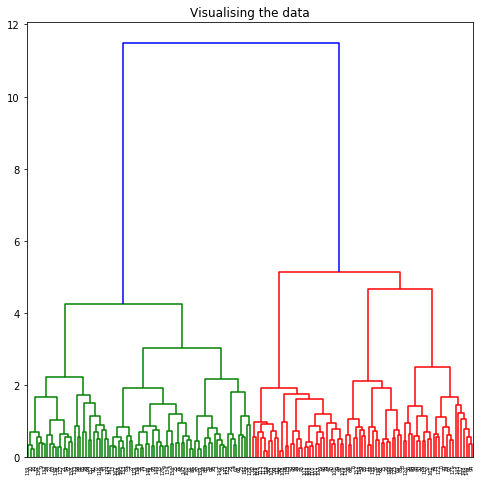

In [241]:
import matplotlib.pyplot as plt

plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
Dendrogram = shc.dendrogram((shc.linkage(X_normalized, method ='ward')))

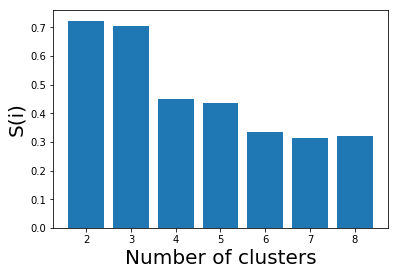

In [242]:
ac2 = AgglomerativeClustering(n_clusters = 2)
ac3 = AgglomerativeClustering(n_clusters = 3)
ac4 = AgglomerativeClustering(n_clusters = 4)
ac5 = AgglomerativeClustering(n_clusters = 5)
ac6 = AgglomerativeClustering(n_clusters = 6)
ac7 = AgglomerativeClustering(n_clusters = 7)
ac8 = AgglomerativeClustering(n_clusters = 8)


k = [2, 3, 4, 5, 6, 7, 8]
  
# Appending the silhouette scores of the different models to the list
silhouette_scores = []
silhouette_scores.append(
        silhouette_score(X, ac2.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac3.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac4.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac5.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac6.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac7.fit_predict(X)))
silhouette_scores.append(
        silhouette_score(X, ac8.fit_predict(X)))
  
# Plotting a bar graph to compare the results
plt.bar(k, silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()


In [243]:
cluster = ac2.fit(X)
cl_labels = cluster.labels_
df["Cluster"] = cl_labels
df.to_csv("Dataset/SecondLevel/Cluster 3/friday.csv")